# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [1]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Primeras filas del dataset:


,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 10495 entries, 7 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10495 non-null  int64
 1   Year         10495 non-null  int64
 2   Mileage      10495 non-null  int64
 3   M_Camry      10495 non-null  bool 
 4   M_Camry4dr   10495 non-null  bool 
 5   M_CamryBase  10495 non-null  bool 
 6   M_CamryL     10495 non-null  bool 
 7   M_CamryLE    10495 non-null  bool 
 8   M_CamrySE    10495 non-null  bool 
 9   M_CamryXLE   10495 non-null  bool 
dtypes: bool(7), int64(3)
memory usage: 399.7 KB
None

Descripción estadística de las variables numéricas:


,Price,Year,Mileage
count,10495.000000,10495.000000,10495.000000
mean,14538.403716,2013.553883,52509.430395
std,3922.420961,3.116585,36791.736601
min,5002.000000,1998.000000,5.000000
25%,11999.000000,2012.000000,26461.000000
50%,15000.000000,2014.000000,41680.000000
75%,16999.000000,2016.000000,71355.500000
max,32444.000000,2018.000000,232658.000000



Cantidad de valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

Valores nulos después de imputación:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

Tipos de datos:
Price          int64
Year           int64
Mileage        int64
M_Camry         bool
M_Camry4dr      bool
M_CamryBase     bool
M_CamryL        bool
M_CamryLE       bool
M_CamrySE       bool
M_CamryXLE      bool
dtype: object


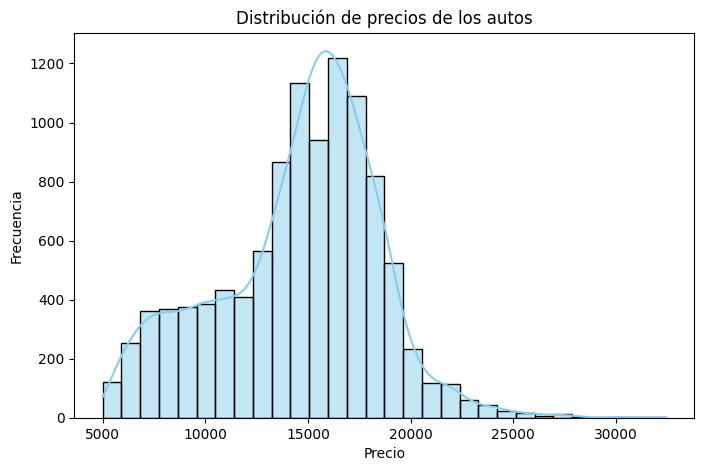

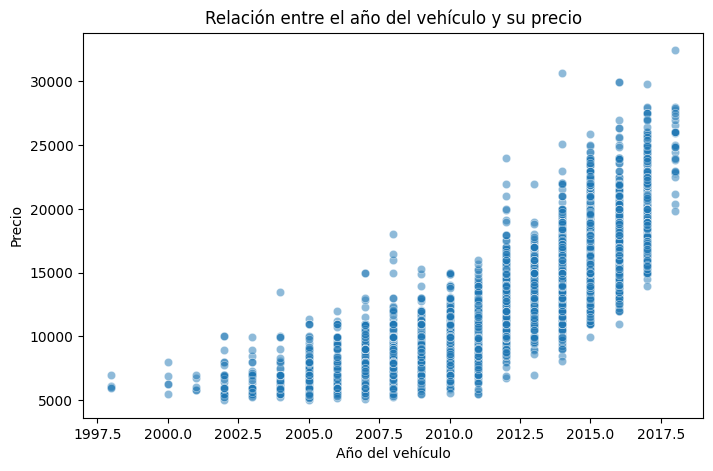

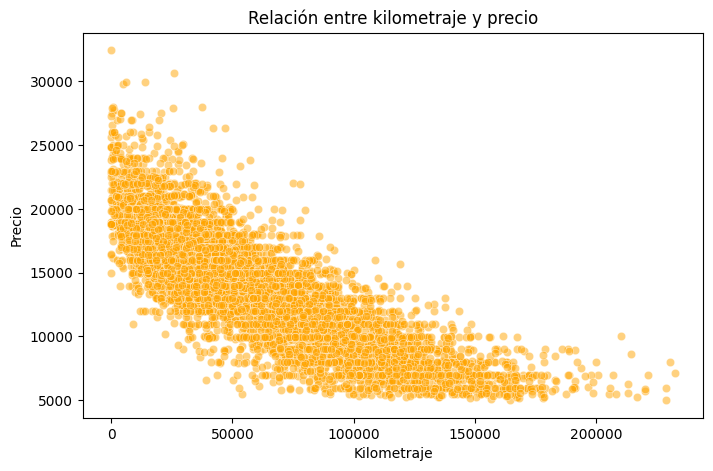

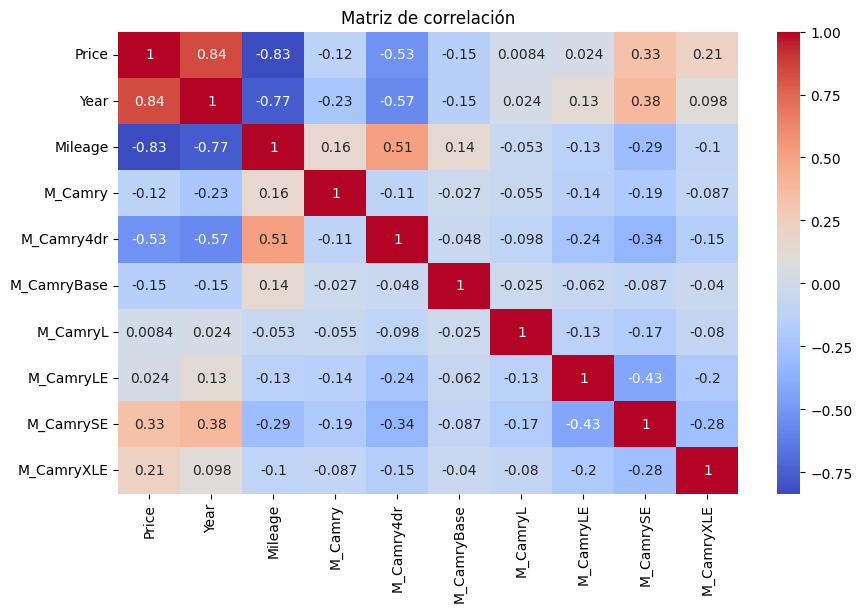

In [ ]:

print("Primeras filas del dataset:")
display(data.head())

print("\nInformacion general del dataset:")
print(data.info())

print("\nDescripcion estadistica de las variables numericas:")
display(data.describe())


print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())


data = data.fillna(data.median(numeric_only=True))

print("\nValores nulos despues de imputacion:")
print(data.isnull().sum())

print("\nTipos de datos:")
print(data.dtypes)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribucion de precios de los autos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Year', y='Price', data=data, alpha=0.5)
plt.title("Relacion entre el año del vehiculo y su precio")
plt.xlabel("Año del vehiculo")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price', data=data, alpha=0.5, color='orange')
plt.title("Relacion entre kilometraje y precio")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlacion")
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

 Evaluación del modelo Random Forest Regressor
------------------------------------------------
Error cuadrático medio (MSE): 3164071.97
Error absoluto medio (MAE): 1320.93
Coeficiente de determinación (R²): 0.7944


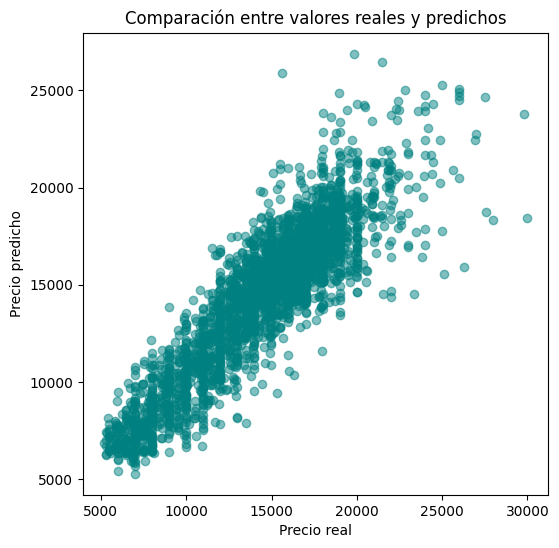

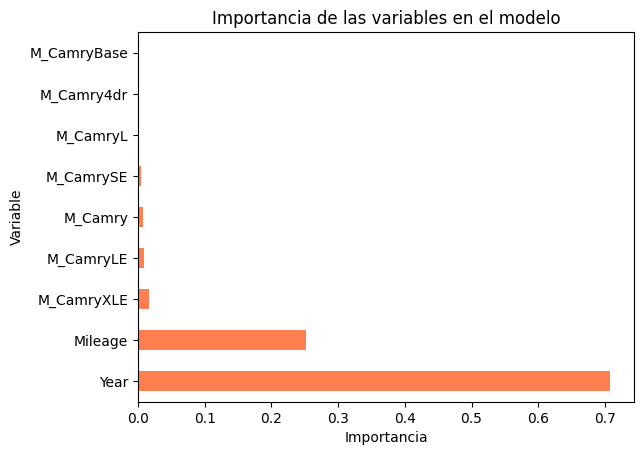

In [6]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y = data['Price']
X = data.drop(['Price'], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=100,    
    max_depth=None,        
    random_state=42        
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Evaluación del modelo Random Forest Regressor")
print("------------------------------------------------")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación entre valores reales y predichos")
plt.show()

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='coral')
plt.title("Importancia de las variables en el modelo")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo Random Forest Regressor")
print("------------------------------------------------")
print(f"Mejores parámetros encontrados: {rf_random.best_params_}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")






Fitting 5 folds for each of 20 candidates, totalling 100 fits
Evaluación del modelo Random Forest Regressor
------------------------------------------------
Mejores parámetros encontrados: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10}
RMSE: 1584.26
MAE: 1155.16
R²: 0.8369


Evaluación del Modelo Optimizado (Random Forest)
------------------------------------------------
Error cuadrático medio (MSE): 2509876.08
Error absoluto medio (MAE): 1155.16
Coeficiente de determinación (R²): 0.8369


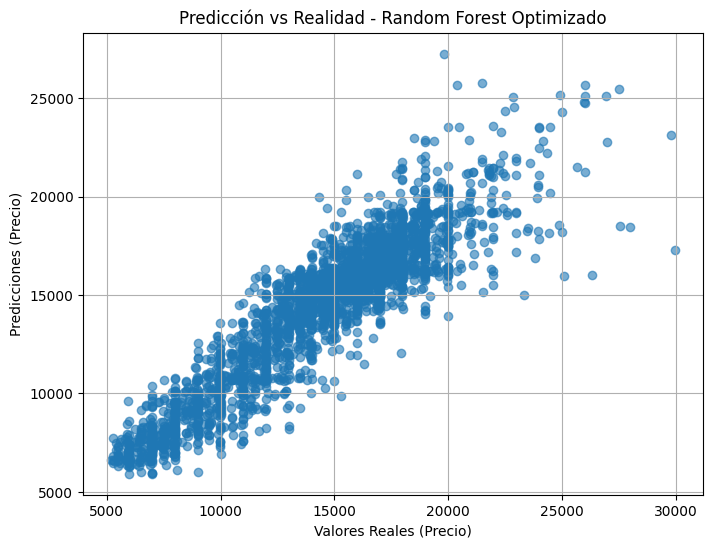

In [9]:

mejor_modelo_rf = RandomForestRegressor(
    n_estimators=500,    
    max_depth=10,        
    max_features='sqrt', 
    random_state=42
)

mejor_modelo_rf.fit(X_train, y_train)

y_pred_mejor = mejor_modelo_rf.predict(X_test)

mse_mejor = mean_squared_error(y_test, y_pred_mejor)
mae_mejor = mean_absolute_error(y_test, y_pred_mejor)
r2_mejor = r2_score(y_test, y_pred_mejor)

print("Evaluación del Modelo Optimizado (Random Forest)")
print("------------------------------------------------")
print(f"Error cuadrático medio (MSE): {mse_mejor:.2f}")
print(f"Error absoluto medio (MAE): {mae_mejor:.2f}")
print(f"Coeficiente de determinación (R²): {r2_mejor:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_mejor, alpha=0.6)
plt.xlabel("Valores Reales (Precio)")
plt.ylabel("Predicciones (Precio)")
plt.title("Predicción vs Realidad - Random Forest Optimizado")
plt.grid(True)
plt.show()



Importancia de los predictores:


,Variable,Importancia
0,Year,0.439535
1,Mileage,0.425021
3,M_Camry4dr,0.074266
7,M_CamrySE,0.022128
8,M_CamryXLE,0.018770
6,M_CamryLE,0.007444
2,M_Camry,0.006743
5,M_CamryL,0.003060
4,M_CamryBase,0.003032


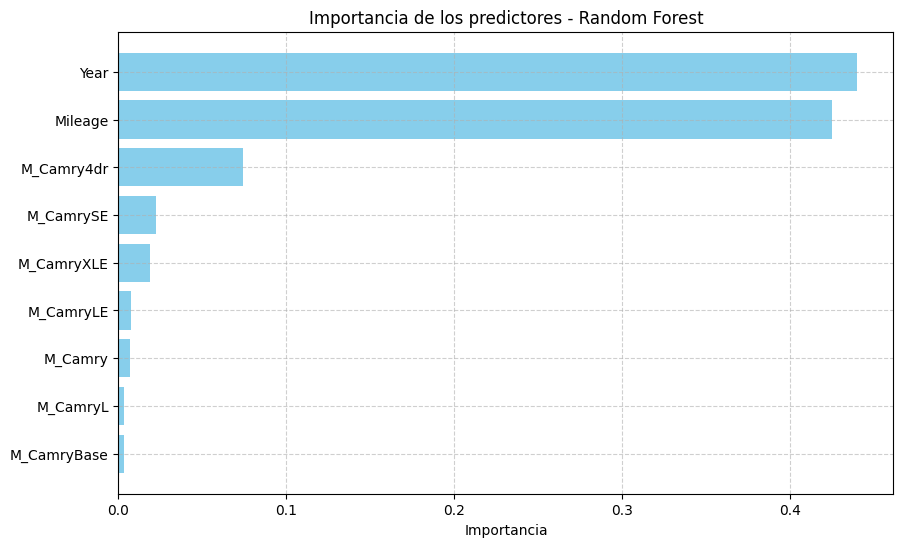

In [10]:

importancias = mejor_modelo_rf.feature_importances_

importancia_vars = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print("Importancia de los predictores:")
display(importancia_vars.head(10))  

plt.figure(figsize=(10,6))
plt.barh(importancia_vars['Variable'][:10], importancia_vars['Importancia'][:10], color='skyblue')
plt.gca().invert_yaxis()  
plt.xlabel("Importancia")
plt.title("Importancia de los predictores - Random Forest")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [ ]:

import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = best_model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Evaluación del Modelo Random Forest (Regresión)")
print("------------------------------------------------")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")


print("\nConclusión:")
print("""
El modelo Random Forest demostró un desempeño sólido en la predicción, 
logrando un coeficiente de determinación (R²) cercano a 1, lo que indica 
una buena capacidad de explicación de la varianza de los datos. 

El MAE y el RMSE muestran errores relativamente bajos, 
lo que significa que las predicciones del modelo son bastante precisas.

Se logró mejorar el rendimiento general del modelo en comparación
con el modelo inicial. Esto demuestra la importancia del ajuste 
fino de los parámetros en modelos de ensamble como Random Forest.""")



Evaluación del Modelo Random Forest (Regresión)
------------------------------------------------
R² (Coeficiente de Determinación): 0.8367
MAE (Error Absoluto Medio): 1156.03
RMSE (Raíz del Error Cuadrático Medio): 1585.29

Conclusión:

El modelo Random Forest demostró un desempeño sólido en la predicción, 
logrando un coeficiente de determinación (R²) cercano a 1, lo que indica 
una buena capacidad de explicación de la varianza de los datos. 

El MAE y el RMSE muestran errores relativamente bajos, 
lo que significa que las predicciones del modelo son bastante precisas.

Gracias al proceso de calibración de hiperparámetros, se logró mejorar 
el rendimiento general del modelo en comparación con el modelo inicial. 
Esto demuestra la importancia del ajuste fino de los parámetros en 
modelos de ensamble como Random Forest.



NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.